In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import math
import scipy.stats as st
import statsmodels.api as sm

from datetime import datetime
from IPython.display import display
import warnings
pd.set_option("display.max_rows", None)



# 1. Analyse univariée:
- Categ
- Price
- Age

<AxesSubplot:ylabel='Density'>

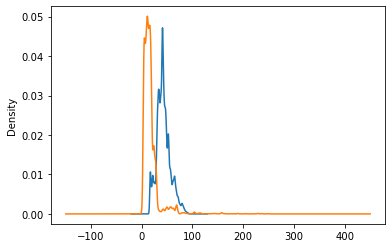

In [22]:
trans_prod_cus["age"].plot.kde()
trans_prod_cus["price"].plot.kde()

# distribution density for ages and prices

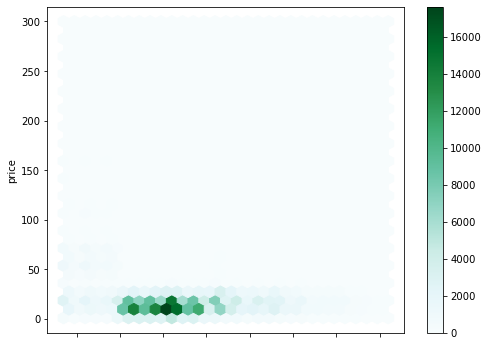

In [23]:
trans_prod_cus.plot.hexbin(x="age", y="price",gridsize=30, figsize= (8,6))
plt.savefig('bi_price_age_hexbin.jpg')

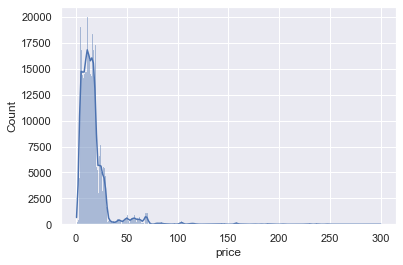

<Figure size 432x288 with 0 Axes>

In [24]:
sns.set(style="darkgrid")
sns.histplot(data=trans_prod_cus, x="price",  bins=300, kde = True)
plt.show()
plt.savefig('uni_price_hist_kde.jpg')

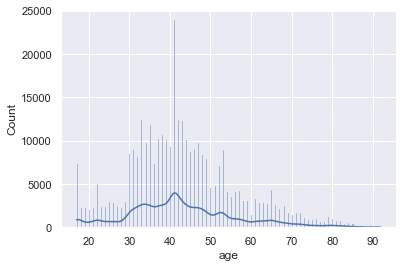

<Figure size 432x288 with 0 Axes>

In [25]:
sns.set(style="darkgrid")
sns.histplot(data=trans_prod_cus, x="age",  bins=300, kde = True)
plt.show()
plt.savefig('uni_age_hist_kde.jpg')

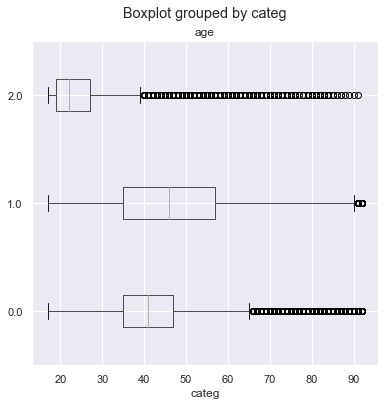

In [26]:
trans_prod_cus.boxplot(column = 'age', by = 'categ', vert= False,  figsize=(6,6))
plt.savefig('age_categ.jpg')

In [27]:
print("mean: ", trans_prod_cus['price'].mean())
print("median: ", trans_prod_cus['price'].median())
print("mode: ", trans_prod_cus['price'].mode())
print("variance:", trans_prod_cus['price'].var(skipna = True))      # variance
print("écart type: ", trans_prod_cus['price'].values.std(ddof=1))      # écart-type 
trans_prod_cus.std(axis=None, skipna= None, level= None, ddof=1, numeric_only= None)       #Ecart-types de toutes les colonnes 


mean:  17.21307993095579
median:  13.9
mode:  0    15.99
dtype: float64
variance: 318.73396822242665
écart type:  17.85312208613754


date       107 days 10:21:33.291584154
price                        17.853122
categ                         0.591039
birth     4939 days 14:10:53.265359808
age                          13.523923
year                          0.379816
month                         3.519807
period                    78154.969802
dtype: object

In [28]:
uni_categ= trans_prod_cus[['categ','price']].groupby(by=["categ"])
uni_categ.head()
sumunicateg= uni_categ.sum()
display("mean of price by categ", uni_categ.mean())
display("sum of price by categ", uni_categ.sum())
display("median by categ:", uni_categ.median())

'mean of price by categ'

,price
categ,
0.0,10.646668
1.0,20.480106
2.0,75.174949


'sum of price by categ'

,price
categ,
0.0,2.230786e+06
1.0,2.247384e+06
2.0,1.319471e+06


'median by categ:'

,price
categ,
0.0,9.99
1.0,19.08
2.0,62.83


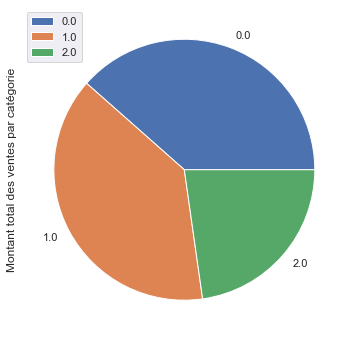

In [29]:
plot = sumunicateg.plot.pie(subplots=True,  figsize=(10, 6)) 
plt.ylabel("Montant total des ventes par catégorie")
plt.savefig('sum_uni_categ_pie.jpg')

#uni categ pie

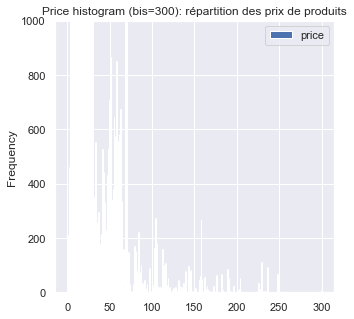

In [30]:
trans_prod_cus.plot(kind="hist",  
              y="price",          
              figsize=(5,5),
            bins= 300,
              ylim=(0,1000))  
plt.title("Price histogram (bis=300): répartition des prix de produits")

plt.savefig('uni_categ_hist.jpg')

#uni histo price

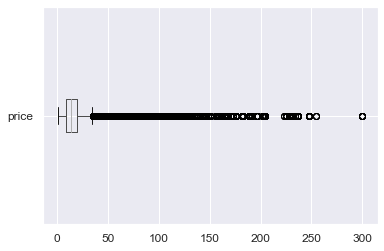

In [31]:
trans_prod_cus.boxplot(column = 'price', vert= False,  fontsize=12)
plt.savefig('boxplot_uni_price.jpg')
#uni price boxplot

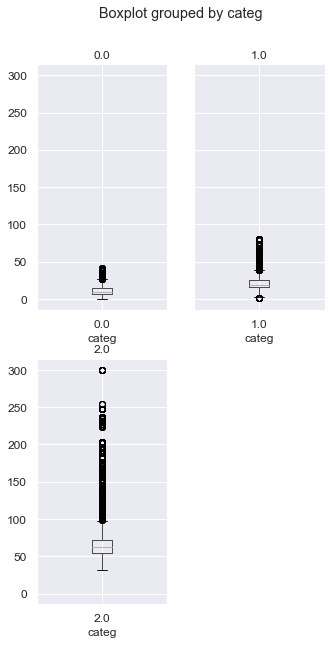

In [32]:
uni_categ.boxplot(column = 'price', by = 'categ',  vert= True, fontsize=12, figsize=(5,10))

plt.savefig('boxplot_uni_categ.jpg')
#uni categ price

### Courbe de Lorenz et Gini - concentration des dépenses en fonction d'âge

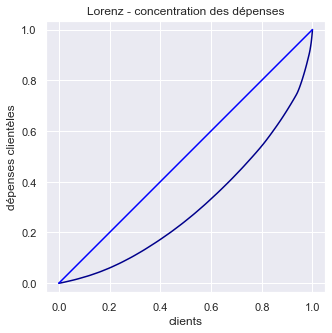

In [35]:
depenses2 = trans_prod_cus['price'].values        
n2 = len(depenses2)
lorenz2 = np.cumsum(np.sort(depenses2)) / depenses2.sum()
lorenz2 = np.append([0], lorenz2)      # La courbe de Lorenz commence à 0

fig, ax = plt.subplots(figsize=[5,5])   
plt.axes().axis('equal')
xaxis = np.linspace(0-1/n2,1+1/n2, n2+1)  
plt.title("Lorenz - concentration des dépenses")
plt.xlabel("clients")
plt.ylabel("dépenses clientèles")
plt.plot(xaxis, lorenz2, drawstyle='steps-post', color = "darkblue" )
plt.plot(xaxis, xaxis, color = "blue")

plt.savefig("lorenz_courbe_price2.jpg")

In [36]:
AUC2 = (lorenz2.sum() -lorenz2[-1]/2 -lorenz2[0]/2)/n2        
S2 = 0.5 - AUC2            
gini2 = 2*S2
round(gini2,4)

0.3921

#### indice de Gini = 39.21%, donc on en conclut qu'au moins 40% du montant de chiffres d'affaires (montant total de 'price' toutes les 'transactions') est amené par 60% des clients. Cela représente une concentration pas très forte et proche égalitaire. 


# 2.  Analyse bivariée :

- Age VS taille du panier moyen (nombre d’articles par session)
- Age VS Fréquence d’achat (ie. nombre d'achats par mois)
- Catégorie VS Sexe
- Age VS Montant d'achat
- Catégorie VS Montant d’achat
- Age VS Catégorie



#### Evolution de chiffres d'affaires au fil du temps 

In [38]:

#Create time series based on trans_prod_cus 

periode=pd.pivot_table(trans_prod_cus, index=['year', 'month'], columns=['categ'], values=['price'], aggfunc='sum')
periode.head()

price                      
categ             0.0        1.0        2.0
year month                                 
2021 3      193659.26  186974.17   98771.48
     4      205304.15  156138.35  111682.70
     5      196197.52  165893.40  127359.59
     6      167958.58  189162.04  124209.56
     7      144753.20  188523.27  147663.47

<Figure size 432x288 with 0 Axes>

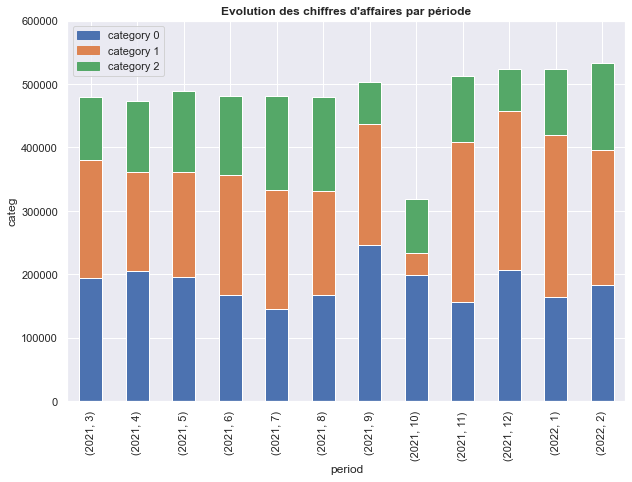

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(); 
periode.plot.bar(figsize=(10,7), ylim= (0, 600000), stacked= True); 
plt.xlabel('period'); 
plt.ylabel('categ') ;

colors = {'category 0':'C0', 'category 1':'C1','category 2':'C2'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title("Evolution des chiffres d'affaires par période", fontsize= 12, fontweight='bold')
plt.show()
plt.savefig("evolutionCA.jpg")

Remark: for October 2021, the turnover for category 1 is lower than other months

In [40]:
periode2=pd.pivot_table(trans_prod_cus, index=['year', 'month'], columns=['categ'], values=['session_id'], aggfunc='count')
periode2.head()
print(periode2.shape)
periode2.head()

(12, 3)


session_id            
categ             0.0   1.0   2.0
year month                       
2021 3          18119  9134  1315
     4          19335  7579  1501
     5          18485  8107  1653
     6          15886  9264  1669
     7          13569  9169  1978

<Figure size 432x288 with 0 Axes>

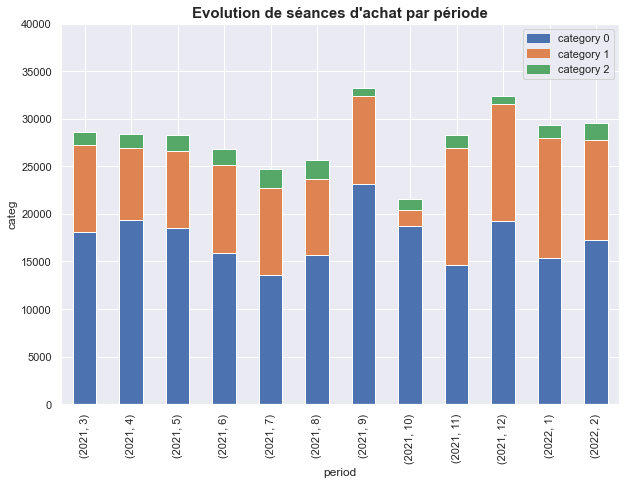

<Figure size 432x288 with 0 Axes>

In [41]:
plt.figure(); 
periode2.plot.bar(figsize=(10,7), ylim= (0, 40000), stacked= True); 
plt.xlabel('period'); 
plt.ylabel('categ') ;

colors = {'category 0':'C0', 'category 1':'C1','category 2':'C2'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title("Evolution de séances d'achat par période", fontsize= 15, fontweight='bold')
plt.show()
plt.savefig("evolutionsession.jpg")

### data du mois octobre 2021

In [42]:
# to select only data of a certain month with datatime format

from datetime import datetime

month10 = trans_prod_cus[trans_prod_cus['period'] == 202110]
month10= month10.sort_values('year-month-day', ascending = True)
print(month10.info())
month10.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21584 entries, 148560 to 186926
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_prod         21584 non-null  object        
 1   date            21584 non-null  datetime64[ns]
 2   session_id      21584 non-null  object        
 3   client_id       21584 non-null  object        
 4   price           21584 non-null  float64       
 5   categ           21584 non-null  float64       
 6   sex             21584 non-null  object        
 7   birth           21584 non-null  datetime64[ns]
 8   age             21584 non-null  int64         
 9   year-month-day  21584 non-null  object        
 10  year            21584 non-null  int64         
 11  month           21584 non-null  int64         
 12  period          21584 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(5)
memory usage: 2.3+ MB
None


,id_prod,date,session_id,client_id,price,categ,sex,birth,age,year-month-day,year,month,period
148560,0_1441,2021-10-01 01:50:40.508934,s_98212,c_3454,18.99,0.0,m,1969-01-01,52,2021-10-01,2021,10,202110
205238,0_1447,2021-10-01 07:53:06.972800,s_98320,c_6915,4.99,0.0,m,1998-01-01,23,2021-10-01,2021,10,202110
147152,0_1953,2021-10-01 13:39:07.640402,s_98437,c_3156,8.99,0.0,m,1978-01-01,43,2021-10-01,2021,10,202110
275283,0_1999,2021-10-01 07:10:50.773485,s_98299,c_2722,12.99,0.0,m,1986-01-01,35,2021-10-01,2021,10,202110
147373,0_1467,2021-10-01 06:41:25.030981,s_98299,c_2722,4.99,0.0,m,1986-01-01,35,2021-10-01,2021,10,202110


In [43]:
month10by = month10[['categ', 'session_id']].groupby(by=['categ']).count()
month10by2 = month10[['categ', 'price']].groupby(by=['categ']).sum()
print(month10by)
print(month10by2)

       session_id
categ            
0.0         18758
1.0          1666
2.0          1160
           price
categ           
0.0    199290.18
1.0     33762.32
2.0     86179.70


In [44]:
month_pvt = trans_prod_cus.pivot_table(columns = ['year','month'], index = ['categ'], values= "price", aggfunc='sum')
month_pvt.head()

year        2021                                                         \
month         3          4          5          6          7          8    
categ                                                                     
0.0    193659.26  205304.15  196197.52  167958.58  144753.20  167770.70   
1.0    186974.17  156138.35  165893.40  189162.04  188523.27  162991.38   
2.0     98771.48  111682.70  127359.59  124209.56  147663.47  148635.99   

year                                                    2022             
month         9          10         11         12         1          2   
categ                                                                    
0.0    246388.05  199290.18  155946.98  206048.68  164214.27  183254.04  
1.0    190613.78   33762.32  252910.39  251026.75  256267.92  213120.64  
2.0     65893.29   86179.70  104136.00   65934.49  102524.72  136479.72

In [45]:
month_pvt2 = trans_prod_cus.pivot_table(columns = ['categ'], index = ['year', 'month'], values= "price", aggfunc= 'sum' )
month_pvt2

# price amount subtotal of products in every categ / distribution de chiffres d'affaires par catégorie de produit -- bar chart 

categ             0.0        1.0        2.0
year month                                 
2021 3      193659.26  186974.17   98771.48
     4      205304.15  156138.35  111682.70
     5      196197.52  165893.40  127359.59
     6      167958.58  189162.04  124209.56
     7      144753.20  188523.27  147663.47
     8      167770.70  162991.38  148635.99
     9      246388.05  190613.78   65893.29
     10     199290.18   33762.32   86179.70
     11     155946.98  252910.39  104136.00
     12     206048.68  251026.75   65934.49
2022 1      164214.27  256267.92  102524.72
     2      183254.04  213120.64  136479.72

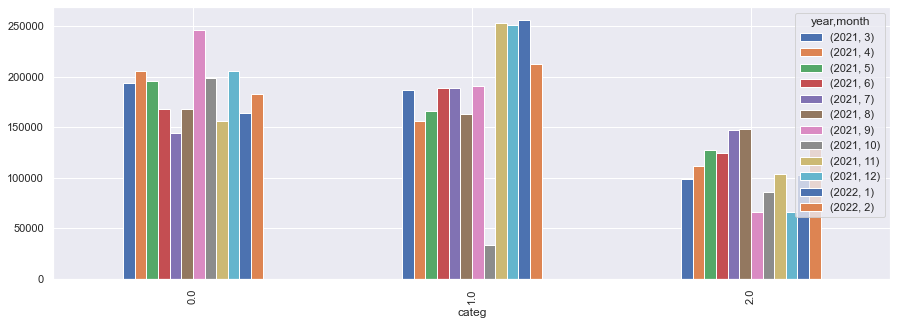

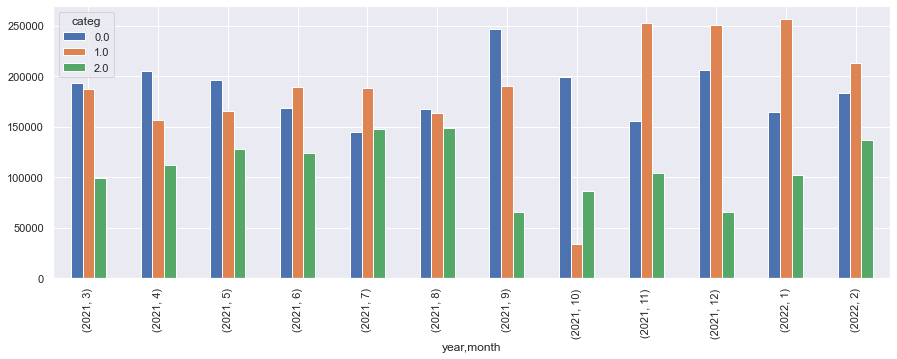

In [46]:
month_pvt.plot(kind="bar", 
                 figsize=(15,5),
                 stacked= False)
plt.savefig("month1.jpg")

month_pvt2.plot(kind="bar", 
                 figsize=(15,5),
                 stacked= False)
plt.savefig("month2.jpg")



#### remark: an outlier in sales quantity of categ 1 on month10: 1666 is much less than the quantity in other months

#### then how to find where the categ 1 of month10 are missing and thus repare it ?? 

#### => Statistics (mean, median, mode) by month 

In [47]:
categ1 = month_pvt2[1].values
print(categ1)

import statistics
print('                                       ')
print('Statistics for products of category 1:       ')
print("mean:", statistics.mean(categ1))  
print("median:", statistics.median(categ1))
print("mode:", statistics.mode(categ1))


[186974.16999999 156138.35       165893.4        189162.03999999
 188523.26999999 162991.38       190613.77999999  33762.32
 252910.38999998 251026.74999998 256267.91999998 213120.63999999]
                                       
Statistics for products of category 1:       
mean: 187282.03416665728
median: 188842.65499999246
mode: 186974.16999999323


/Users/ZoeyZhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


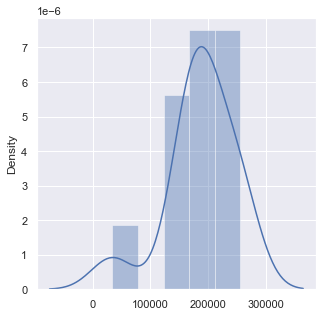

In [48]:
fig,ax = plt.subplots(figsize=(5,5))
sns.distplot(categ1)
plt.savefig("categ1distribution.jpg")

# tendance centrale:  distribution unimodale  et fortement centré autour de 200000

In [49]:
month10_pvt = month10.pivot_table(index = ['year-month-day'], columns = ['categ'], values= "price", aggfunc='sum')
print(month10_pvt.sum())
month10_pvt

categ
0.0    199290.18
1.0     33762.32
2.0     86179.70
dtype: float64


categ,0.0,1.0,2.0
year-month-day,,,
2021-10-01,6947.51,7003.79,2958.06
2021-10-02,7138.02,NaN,1895.13
2021-10-03,6783.58,NaN,2060.49
2021-10-04,6551.25,NaN,2600.09
2021-10-05,6357.91,NaN,3032.55
2021-10-06,7543.59,NaN,1798.12
2021-10-07,6404.01,NaN,1787.07
2021-10-08,7069.53,NaN,3137.82
2021-10-09,6808.69,NaN,2616.67


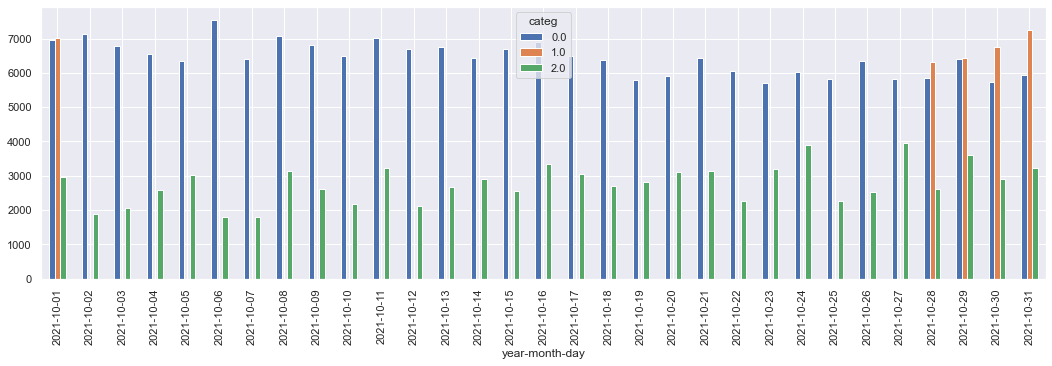

In [50]:
month10_pvt.plot(kind="bar", 
                 figsize=(18,5),
                 stacked= False)

plt.savefig("month10.jpg")

### traitement de données manquantes: imputation 

In [51]:
month10_pvt.reset_index(inplace = True)
month10_pvt[1].fillna(5905, inplace= True)
print(month10_pvt.sum())
month10_pvt.head()

categ
0.0    199290.18
1.0    187292.32
2.0     86179.70
dtype: float64


categ,year-month-day,0.0,1.0,2.0
0,2021-10-01,6947.51,7003.79,2958.06
1,2021-10-02,7138.02,5905.00,1895.13
2,2021-10-03,6783.58,5905.00,2060.49
3,2021-10-04,6551.25,5905.00,2600.09
4,2021-10-05,6357.91,5905.00,3032.55


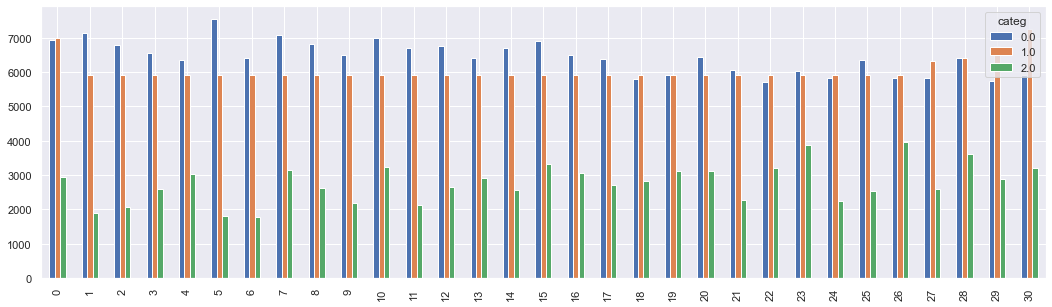

In [52]:
month10_pvt.plot(kind="bar", 
                 figsize=(18,5),
                 stacked= False)

plt.savefig("month10_2.jpg")
 
# fill the NaN in categ1 of month10 data by mean

       session_id
categ            
0.0         14588
1.0         12316
2.0          1373
           price
categ           
0.0    155946.98
1.0    252910.39
2.0    104136.00


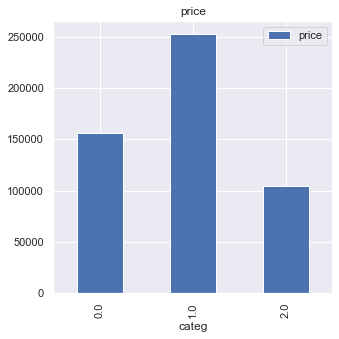

In [60]:
month11 = trans_prod_cus[trans_prod_cus['date'].dt.month == 11]

month11by = month11[['categ', 'session_id']].groupby(by=['categ']).count()
month11by2 = month11[['categ', 'price']].groupby(by=['categ']).sum()
print(month11by)
print(month11by2)

month11by2.plot(kind="bar", 
                subplots= True,
                 figsize=(5,5),
                 stacked= False)

plt.savefig("month11.jpg")

       session_id
categ            
0.0         23124
1.0          9268
2.0           874
           price
categ           
0.0    246388.05
1.0    190613.78
2.0     65893.29


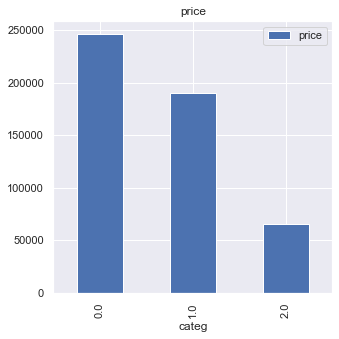

In [61]:
month9 = trans_prod_cus[trans_prod_cus['date'].dt.month == 9]

month9by = month9[['categ', 'session_id']].groupby(by=['categ']).count()
month9by2 = month9[['categ', 'price']].groupby(by=['categ']).sum()
print(month9by)
print(month9by2)

month9by2.plot(kind="bar", 
                subplots= True,
                 figsize=(5,5),
                 stacked= False)

plt.savefig("month9.jpg")

In [62]:
trans_prod_cus['period2']= pd.to_datetime(trans_prod_cus['period'], format = '%Y%m', errors= 'coerce')
trans_prod_cus.head()


,id_prod,date,session_id,client_id,price,categ,sex,birth,age,year-month-day,year,month,period,period2
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977-01-01,44,2021-04-10,2021,4,20214,2021-04-01
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000-01-01,21,2022-02-03,2022,2,20222,2022-02-01
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979-01-01,42,2021-09-23,2021,9,20219,2021-09-01
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963-01-01,58,2021-10-17,2021,10,202110,2021-10-01
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980-01-01,41,2021-07-17,2021,7,20217,2021-07-01


In [63]:
bymonthcount = trans_prod_cus[['period2', 'price']].groupby(by=['period2']).sum()
bymonthcount 

# chiffre d'affaires mensuelles 

,price
period2,
2021-03-01,479404.91
2021-04-01,473125.20
2021-05-01,489450.51
2021-06-01,481330.18
2021-07-01,480939.94
2021-08-01,479398.07
2021-09-01,502895.12
2021-10-01,319232.20
2021-11-01,512993.37


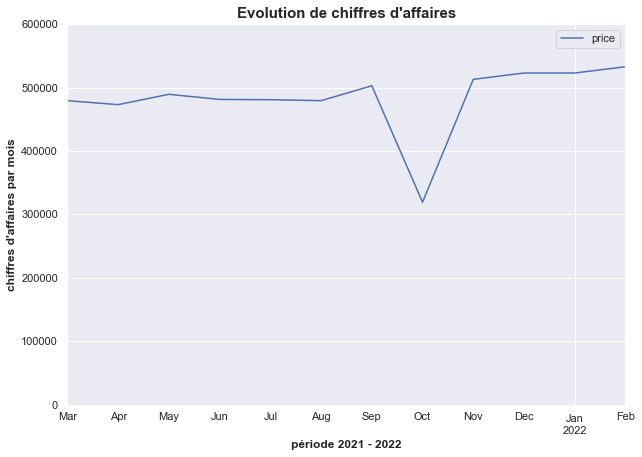

<Figure size 432x288 with 0 Axes>

In [64]:
bymonthcount.reset_index(inplace= True)

bymonthcount.plot.line(x= 'period2', y= 'price', figsize=(10,7), ylim= (0, 600000))
plt.xlabel('période 2021 - 2022', fontsize= 12, fontweight="bold")
plt.ylabel("chiffres d'affaires par mois", fontsize= 12, fontweight="bold")
plt.title("Evolution de chiffres d'affaires", fontsize= 15, fontweight="bold")

plt.show()
plt.savefig('evolutiondesCA_line.jpg')

In [65]:
age_panier = trans_prod_cus[['age', 'id_prod']].groupby(by=['age']).count()
age_panier.reset_index(inplace =True)
age_panier.head()

# how many products brought by clients of same age 

,age,id_prod
0,17,7348
1,18,2182
2,19,2224
3,20,2032
4,21,2175


In [66]:
customers['birth'] = pd.to_datetime(customers['birth'], format = '%Y', errors ='coerce')
customers['age'] = customers['birth'].apply(calculate_age)

age_pop =customers[['age', 'client_id']].groupby('age').count()
age_pop.reset_index(inplace =True)
age_pop.head()

# pop of same age

,age,client_id
0,17,440
1,18,146
2,19,146
3,20,129
4,21,136


In [67]:
taille_panier = pd.merge(age_panier, age_pop, on = 'age')
taille_panier['panier_moyen'] = round(taille_panier['id_prod']/taille_panier['client_id'], 2)
taille_panier.head()

,age,id_prod,client_id,panier_moyen
0,17,7348,440,16.70
1,18,2182,146,14.95
2,19,2224,146,15.23
3,20,2032,129,15.75
4,21,2175,136,15.99


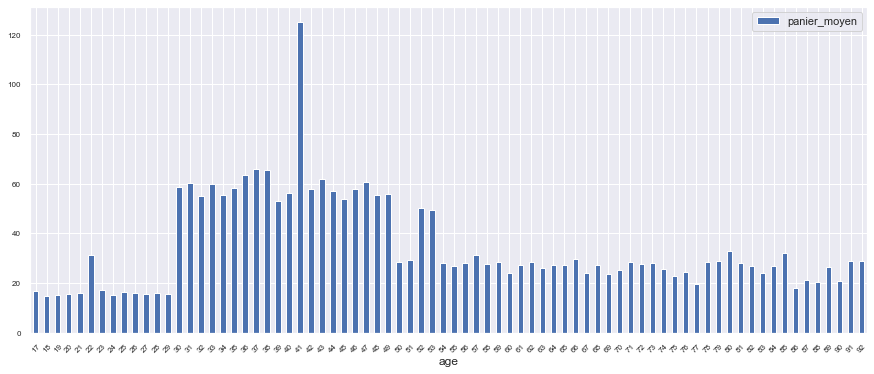

In [68]:
taille_panier.plot(
                     kind= "bar",
                     x = "age" ,
                      y= "panier_moyen",
                       rot = 45, 
                       fontsize= 8,
                       figsize = (15, 6),
                       stacked= False)

plt.savefig('panier_moyen.jpg')

### Bivariée: Age vs Taille du panier moyen (en montant d'achats) : montant_by_session
### Bivariée: Age vs Fréquence d'achats : mean_session

In [69]:
age_session = trans_prod_cus[['age', 'session_id']].groupby(by=['age']).count()
age_session= age_session.rename(columns= {'session_id': 'total_session' })
age_session.head()

age_price = trans_prod_cus[['age', 'price']].groupby(by=['age']).sum()
age_price= age_price.rename(columns= {'price': 'total_montant' })
age_price.head()

age_montant = age_session.merge(age_price, how='left', on='age').merge(age_pop, on = 'age', how= 'left')

age_montant['montant_by_session']=round(age_montant['total_montant']/age_montant['total_session'], 2)    # taille du panier moyen
age_montant['mean_session'] = round(age_montant['total_session']/age_montant['client_id'],2)            # fréquence d'achat

age_montant.head()



,age,total_session,total_montant,client_id,montant_by_session,mean_session
0,17,7348,295387.98,440,40.20,16.70
1,18,2182,88461.39,146,40.54,14.95
2,19,2224,89920.34,146,40.43,15.23
3,20,2032,84881.48,129,41.77,15.75
4,21,2175,80110.24,136,36.83,15.99


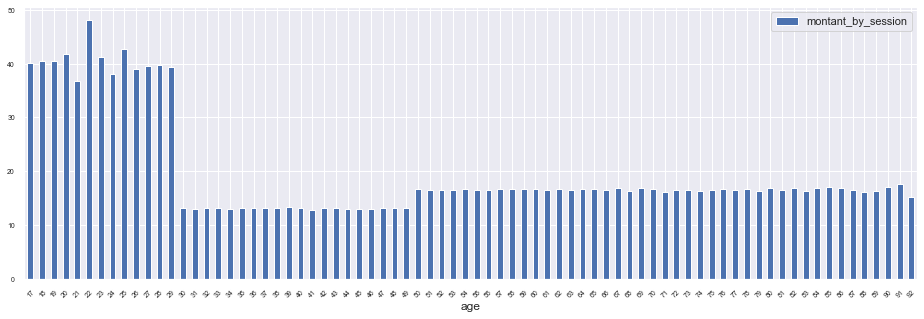

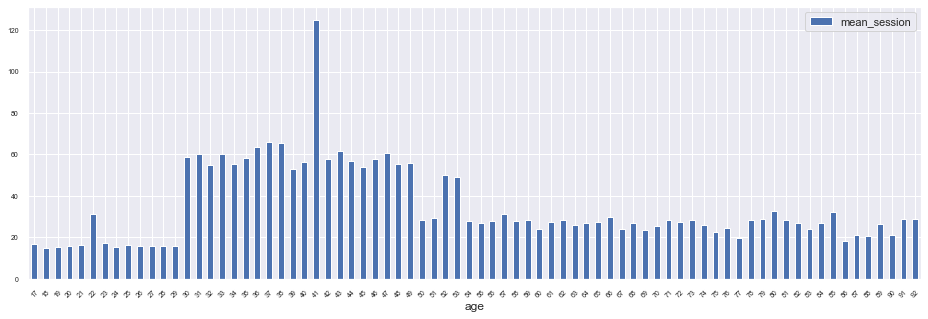

In [70]:
age_montant.plot(kind="bar",
                 x="age", 
                 y="montant_by_session",
                 rot= 45,
                 fontsize=7,
                 figsize=(16,5),
                 stacked= True)


plt.savefig("agemontant.jpg")


age_montant.plot(kind="bar",
                 x="age", 
                 y="mean_session",
                 rot= 45,
                 fontsize=7,
                 figsize=(16,5),
                 stacked= True)
plt.savefig("agesession.jpg")

### Analyse bivariée: catégorie vs sexe


In [71]:
categ_sex = trans_prod_cus.pivot_table(index = ['categ'], columns = ['sex'], values= "price", aggfunc=sum)
categ_sex

sex,f,m
categ,,
0.0,1104085.17,1126700.44
1.0,1137856.49,1109527.92
2.0,617799.31,701671.40


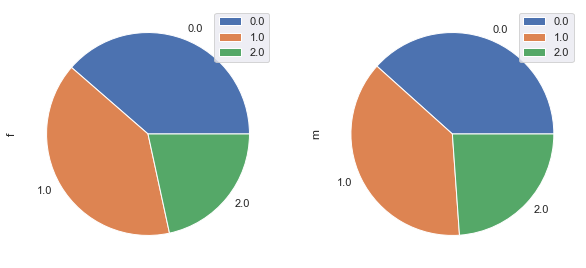

In [72]:
plot = categ_sex.plot.pie(subplots=True,  figsize=(10, 6))
plt.savefig('categsex.jpg')

In [73]:
categ_sex2 = trans_prod_cus.pivot_table(index = ['categ'], columns = ['sex'], values= "id_prod", aggfunc='count')
categ_sex2

sex,f,m
categ,,
0.0,103846,105683
1.0,55469,54266
2.0,8260,9292


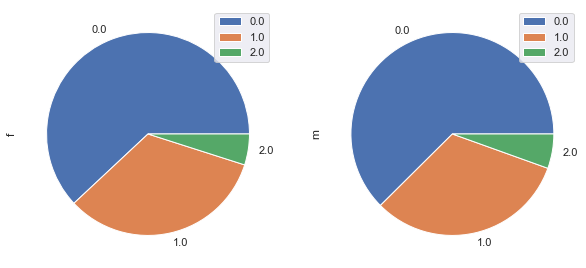

In [74]:
plot = categ_sex2.plot.pie(subplots=True, figsize=(10, 6))
plt.savefig('categsex2.jpg')

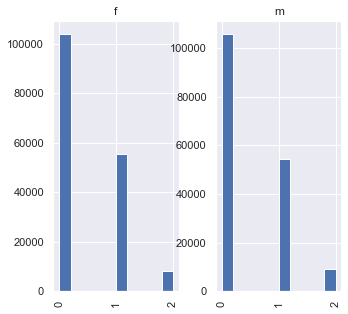

In [75]:
trans_prod_cus.hist(column='categ', by = 'sex', figsize=(5,5))
plt.savefig('categ_sex_hist.jpg')

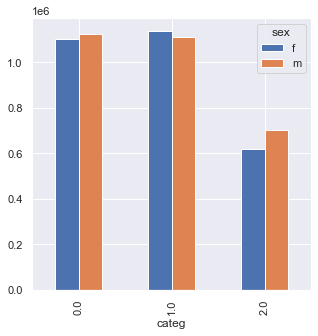

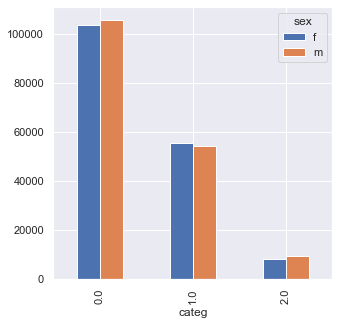

In [76]:
# distribution of categories by sex 

categ_sex.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=False)
plt.savefig('categ_sex1.jpg')


categ_sex2.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=False)
plt.savefig('categ_sex2.jpg')

### Bivariée:  Age VS Montant total d'achat (Répartition de montant d'achat par tranche d'âge et selon sexe)

In [77]:
# create a function class_age
# age vs categ and sex

def class_age(x):
    if x <= 30:
        return '18-30'
    
    elif x > 30 and x <= 45:
        return '30-45'
    
    elif x > 45 and x <= 60:
        return '45-60'
    
    elif x > 60 and x <= 75:
        return '60-75'
    
    elif x > 75 and x <= 90:
        return '75-90'
    
    elif x > 90:
        return '90+'
    
trans_prod_cus['class_age'] = trans_prod_cus['age'].apply(lambda x: class_age(x))
agesex_pvt = trans_prod_cus.pivot_table(index = ['class_age', 'sex'],  values= "price", aggfunc=sum)
agesex_pvt.head()

price
class_age sex            
18-30     f     800863.59
          m     908630.70
30-45     f    1029260.12
          m    1132994.96
45-60     f     671398.73

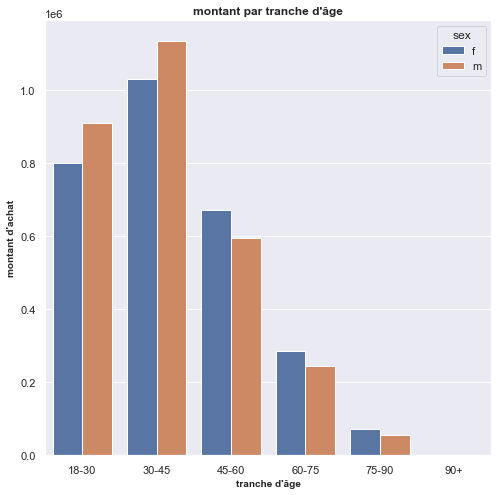

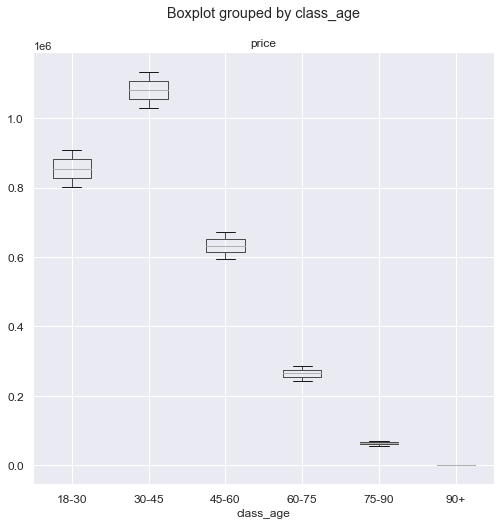

In [78]:
agesex_pvt.reset_index( inplace=True)
plt.figure(figsize=(8, 8))
sns.barplot( x = 'class_age', y = 'price',  hue= 'sex', data=agesex_pvt)

plt.xlabel("tranche d'âge", fontsize= 10, fontweight="bold")
plt.ylabel("montant d'achat", fontsize= 10, fontweight="bold")
plt.title("montant par tranche d'âge", fontsize= 12, fontweight="bold")

plt.savefig('price_by_classage_sex.jpg')

agesex_pvt.boxplot(column = 'price', by = 'class_age',  fontsize=12,  figsize=(8,8))
plt.savefig('price_by_classage.jpg')

In [79]:
# age vs categ , price

def class_age(x):
    if x <= 30:
        return '18-30'
    
    elif x > 30 and x <= 45:
        return '30-45'
    
    elif x > 45 and x <= 60:
        return '45-60'
    
    elif x > 60 and x <= 75:
        return '60-75'
    
    elif x > 75 and x <= 90:
        return '75-90'
    
    elif x > 90:
        return '90+'
    
trans_prod_cus['class_age'] = trans_prod_cus['age'].apply(lambda x: class_age(x))

agecateg_pvt = trans_prod_cus.pivot_table(index = ['class_age', 'categ'],   values= 'price', aggfunc=sum)

agecateg_pvt.head()

price
class_age categ              
18-30     0.0    1.594341e+05
          1.0    3.342012e+05
          2.0    1.215859e+06
30-45     0.0    1.362260e+06
          1.0    7.669121e+05

### Bivariée: tranche d'âge vs montant d'achat: Répartition de la masse de montant d'achats en fonction de tranche d'âge (class_age) 
### Bivariée: catégorie vs montant d'achat:Répartition de la masse de montant d'achats selon la catégorie de produits 

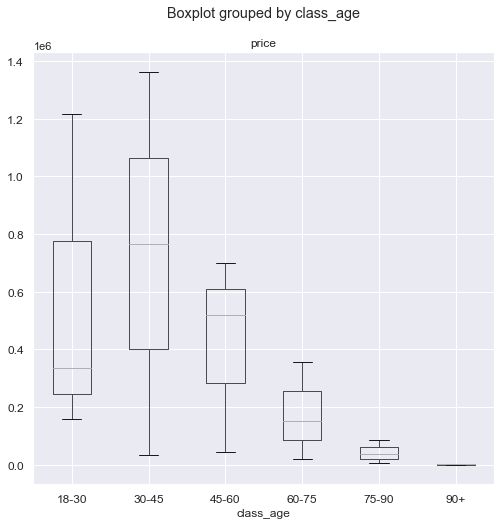

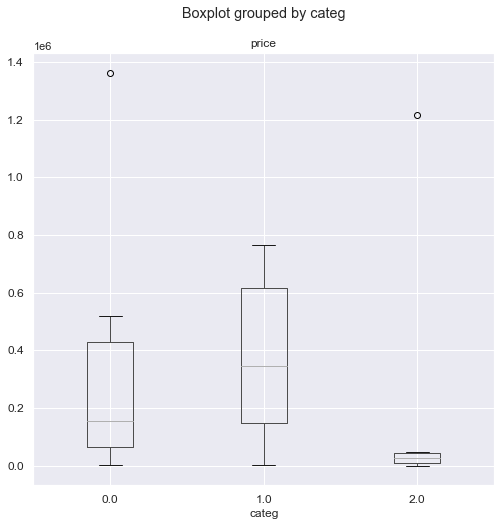

In [80]:
agecateg_pvt.boxplot(column='price', by = 'class_age', fontsize=12,  figsize=(8,8))
plt.savefig('price_by_class_age2.jpg')

agecateg_pvt.boxplot(column = 'price', by = 'categ',  fontsize=12,  figsize=(8,8))
plt.savefig('price_by_categ.jpg')

### Analyse bivariée: Répartition de montants d'achat en fonction de catégorie et tranches d'âge

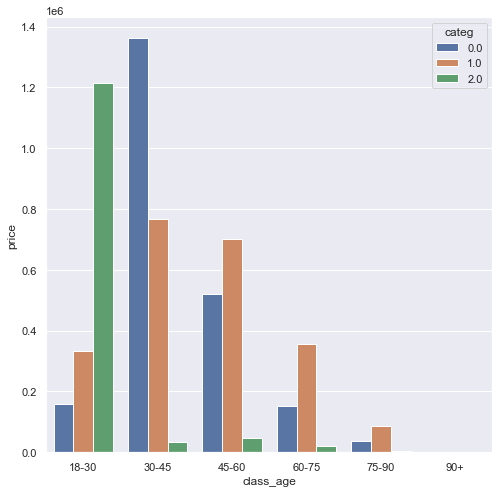

In [81]:
agecateg_pvt.reset_index( inplace=True)
plt.figure(figsize=(8, 8))

sns.barplot(x = 'class_age', 
                   y = 'price', 
                  hue = 'categ',
                 data = agecateg_pvt)

plt.savefig('agecateg_vs_price.jpg')

#### On y conclut que: 

#### - catégorie 0: a pour consommateurs principaux la population de 30-60 ans, dont les 30-45 ans occupent la plus grande majorité. 
#### - catégorie 1: a pour consommateurs principaux la population de 30-60 ans, répartition relativement égalitaire
#### - catégorie 2: a pour consommateurs la population de 18-30 ans, et forte concentration avec très peu de consomateurs au delà de 30 ans. 


## Courbe de Lorenz et Gini - concentration des dépenses en fonction de tranche d'âge


In [1]:
depenses = agecateg_pvt['price'].values        #sous-totaux des dépenses par age (all people of same age) et par categ

n = len(depenses)
lorenz = np.cumsum(np.sort(depenses)) / depenses.sum()
lorenz = np.append([0], lorenz)      # La courbe de Lorenz commence à 0

fig, ax = plt.subplots(figsize=[5,5])   
plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n, n+1)    #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.xlabel("tranche d'âge")
plt.title("Lorenz - dépenses par tranche d'âge")
plt.plot(xaxis, lorenz, drawstyle='steps-post', color = "darkblue" )
plt.plot(xaxis, xaxis, color = "blue")

plt.savefig("lorenz_courbe.jpg")


NameError: name 'agecateg_pvt' is not defined

In [83]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n        # Surface sous la courbe de Lorenz. 
S = 0.5 - AUC           # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.6480633354879031

#### indice de Gini = 64%, donc on en conclut qu'au moins 64% du montant de chiffres d'affaires est amené par 36% de la masse clientèle de certaines tranches d'âge 


## Fin des codes :) 